<a href="https://colab.research.google.com/github/jharris18/practice/blob/master/Copy_of_Jason_Harris_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Police Shootings in the United States**

# **1. Problem Statement:**

The issue of racial bias within the police system in the United States has been a widely discussed and controversial issue. Death from Police violence has been claimed to be a leading cause of death for minorities in the United States. In order to obtain a clear understanding of the issue, we must see if race is the primary component of police killings or if there are other factors that might be the primary causes or catalysts for police shootings. Using publicly available data, I will identify factors that were involved with the deaths of citizens from police officers in the United States and identify any possible correlations or causal factors that lead to police shootings.


# **2. Hypothesis:**

Taking into account historical reports and current observations of what appear to be racially motivated incidents involving the police, I expect to see some kind of relationship between the death of minorities and police shootings. I suspect African Americans will have the higher death rates when compared to whites and the other racial minority groups in the United States.


# **3. Description of the data set:**

In 2015, The Washington Post began to log every fatal shooting by an on-duty police officer in the United States. The Post began tracking more than a dozen details about each killing including the race of the deceased, the circumstances of the shooting, whether the person was armed and whether the victim was experiencing a mental-health crisis. The Post examined local news reports, law enforcement websites and social media. They also monitored independent databases such as Killed by Police and Fatal Encounters. This data set contains data from January 2015 to August 2020.

# **4. Data Dictionary**

id- unique identifier for each victim

name- the name of the victim

date- the date of the fatal shooting in YYYY-MM-DD format

manner_of_death- shot or shot and tasered

armed- indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm

age- the age of the victim

gender- the gender of the victim.The Post identifies victims by the gender they identify with if reports indicate that it   differs from their biological sex.

race- race of the victim

city- the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.

state- two-letter postal code abbreviation

signs_of_mental _illness- News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.

threat_level- The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.

flee- News reports have indicated the victim was moving away from officers

body_camera- News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

# **Choosing the Variables**

During the initial analysis of the dataset, I identified the following attributes as being unnecessary for the goals of this project. The “id” and “name” were unnecessary, as there were unlikely to be any correlation between police shootings and the id or name of the subjects. I also dropped the “date” column, for I didn’t intend to do any time involved analysis for shootings. I merely only wished to identify specific factors such as race or weapons that led to deaths from police shootings. Lastly, I dropped the city column and focused primarily on the state column with the belief that the whole state would represent an average of the individual cities. The remaining attributes were factors that I believed would possibly affect an officer’s judgement to use deadly force, and thus were the final attributes for the data set. 

# **5. Data wrangling and cleaning:** 

The data was saved locally on my system after being downloaded from Kaggle. I accessed the data in Jupyter notebook utilizing the import feature in Pandas. I identified attributes that I deemed unnecessary for the goals of this analysis and I dropped those attributes using  drop function in Pandas.  I then used the replace function in Pandas to change the race labels from A, B, W, H, O, and N to Asian, Black, White, Hispanic, Other, and Native American. Lastly, I created a dataframe to show the columns that contained NaN values. I then used the dropna function to drop the NaN rows. 

In [ ]:
from google.colab import files
uploaded = files.upload()

## 6. Explore the Data**

In [ ]:
#import packages and data
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import figure, show
from pandas import set_option
#shootings_df = pd.read_csv('C:\Users\jason\shootings_wash_post.csv')   
shootings_df = pd.read_csv('shootings_wash_post.csv') 

In [ ]:
pip install "pandas==1.0.3" --user

**The data has 5552 rows and 14 columns**

In [ ]:
# Data shape 5552 rows and 14 columns
shootings_df.shape

(5552, 14)

In [ ]:
# Glance at the data
set_option('display.max_columns', None)
shootings_df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


**The data moslty consists of objects which are categorical data. **

In [ ]:
# Identify the data types
shootings_df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

**The data consists of 14 attributes (columns). Not all of the attributes will be useful for this analysis. I will drop the 'id', 'name', 'date', and 'city' columns. **

In [ ]:
# List the columns and identify the ones that may not be useful for our analysis
shootings_df.columns

## **7. Clean the Data**

**Drop the 'id', 'name', 'date', 'city' columns**

In [ ]:
#drop columns from data that are not needed
#create new data frame (df) after dropping columns
df= shootings_df.drop(columns=['id', 'name', 'date', 'city'])
pd.set_option('display.max_columns', None)
df.head(5)

,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
0,shot,gun,53.0,M,A,WA,True,attack,Not fleeing,False
1,shot,gun,47.0,M,W,OR,False,attack,Not fleeing,False
2,shot and Tasered,unarmed,23.0,M,H,KS,False,other,Not fleeing,False
3,shot,toy weapon,32.0,M,W,CA,True,attack,Not fleeing,False
4,shot,nail gun,39.0,M,H,CO,False,attack,Not fleeing,False


**Change the race labels to from A, B, W, H, O, and N to Asian, Black,  White, Hispanic, Other, and Native American**

In [ ]:
# Change the race labels to from A, B, W, H, O, and N to Asian, Black,  White, Hispanic, Other, and Native American
df.replace({'race' : { 'A' : 'Asian', 'W' : 'White', 'B' : 'Black', 'H' : 'Hispanic', 'O' : 'Other', 'N' : 'Native American' }}, inplace = True)
df.head(5)

,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
0,shot,gun,53.0,M,Asian,WA,True,attack,Not fleeing,False
1,shot,gun,47.0,M,White,OR,False,attack,Not fleeing,False
2,shot and Tasered,unarmed,23.0,M,Hispanic,KS,False,other,Not fleeing,False
3,shot,toy weapon,32.0,M,White,CA,True,attack,Not fleeing,False
4,shot,nail gun,39.0,M,Hispanic,CO,False,attack,Not fleeing,False


**Examine the counts for the data in order to get a quick picture of the data. The data should have 5552 rows, but it looks as if some columns may be missing data such as the armed column. **

In [ ]:
# Examine Data count and data types for each column attribute
df.count()    #data counts

manner_of_death            5552
armed                      5339
age                        5307
gender                     5551
race                       4966
state                      5552
signs_of_mental_illness    5552
threat_level               5552
flee                       5290
body_camera                5552
dtype: int64

**Drop all of the rows that contain NaN**

In [ ]:
# Clean out the NaN values from the data
#create a dataframe to display nan rows
df_nan = df[df.isna().any(axis = 1)]
df_nan.head(5)

,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
15,shot,NaN,28.0,M,White,MT,False,undetermined,Not fleeing,False
26,shot,NaN,24.0,M,Black,MN,False,attack,Not fleeing,False
27,shot,NaN,29.0,M,White,MO,False,attack,Not fleeing,False
45,shot,NaN,42.0,M,Black,AZ,False,other,Car,False
52,shot,NaN,29.0,M,Black,FL,False,other,Not fleeing,False


In [ ]:
#drop all rows with NaN values
df = df.dropna(how = 'any')

In [ ]:
#verify all NaN rows were dropped
df_nan2 = df[df.isna().any(axis = 1)]
df_nan2.head(10)

,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera


**Our final dataset consists of 4474 rows and 10 columns**

In [ ]:
#we now have 4474 rows and 10 columns
df.shape

(4474, 10)

**Using the value counts function, I get a picture of characterists of some of the attributes noting values that are highest and lowest. **

For instance, from 2015-2020: 

*Whites experienced the most deaths

*More people were killed while armed with guns

*More males were killed

*More people were shot while not fleeing

*More deaths occured when the officer didn't have a body camera.





In [ ]:
df['manner_of_death'].value_counts()

shot                4241
shot and Tasered     233
Name: manner_of_death, dtype: int64

In [ ]:
df['armed'].value_counts()

gun                   2634
knife                  672
unarmed                338
toy weapon             167
vehicle                132
                      ... 
contractor's level       1
grenade                  1
motorcycle               1
barstool                 1
wasp spray               1
Name: armed, Length: 90, dtype: int64

In [ ]:
df['age'].value_counts()

25.0    162
31.0    161
27.0    156
34.0    152
29.0    150
       ... 
12.0      1
79.0      1
81.0      1
13.0      1
82.0      1
Name: age, Length: 75, dtype: int64

In [ ]:
df['gender'].value_counts()

M    4251
F     223
Name: gender, dtype: int64

In [ ]:
df['race'].value_counts()

White              2292
Black              1184
Hispanic            801
Asian                83
Native American      71
Other                43
Name: race, dtype: int64

In [ ]:
df['state'].value_counts()

CA    636
TX    393
FL    302
AZ    201
CO    157
GA    149
OK    138
NC    136
OH    135
TN    116
WA    115
MO    113
IL     89
LA     89
IN     88
PA     88
NY     86
VA     86
AL     86
NM     83
WI     83
NV     79
KY     75
MI     71
SC     71
MD     67
OR     66
AR     63
UT     57
MN     56
MS     54
NJ     53
KS     46
WV     38
ID     35
AK     33
MA     30
IA     29
HI     23
MT     23
NE     22
CT     17
ME     17
DC     13
SD     13
WY     13
NH     12
ND     10
DE      9
VT      8
RI      2
Name: state, dtype: int64

In [ ]:
df['signs_of_mental_illness'].value_counts()

False    3420
True     1054
Name: signs_of_mental_illness, dtype: int64

In [ ]:
df['threat_level'].value_counts()

attack          2954
other           1352
undetermined     168
Name: threat_level, dtype: int64

In [ ]:
df['flee'].value_counts()

Not fleeing    3008
Car             673
Foot            642
Other           151
Name: flee, dtype: int64

In [ ]:
df['body_camera'].value_counts()

False    3919
True      555
Name: body_camera, dtype: int64

# **8. AGE** 

**From 2015-2020, a higher density of deaths occured amoung younger people where the mean age was 36. **

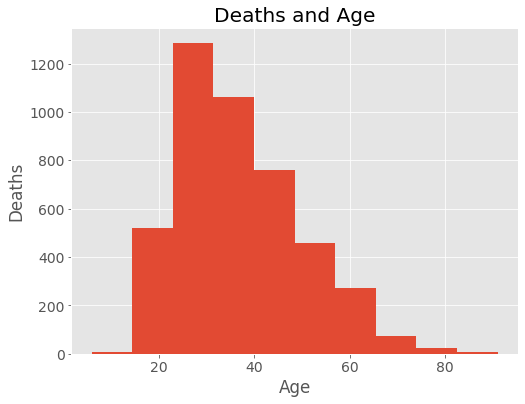

In [ ]:
df.hist('age')
plt.title("Deaths and Age")
plt.xlabel("Age")
plt.ylabel("Deaths")
plt.show()

**Age and Race**

**The violin charts also indicate the young nature of the deaths from police shootings for all racial groups. Whites appear to experience more police shootings at older ages while blacks, hispanics, other, and native americans appear to experience more police shootings at younger ages when compared to the other groups. **


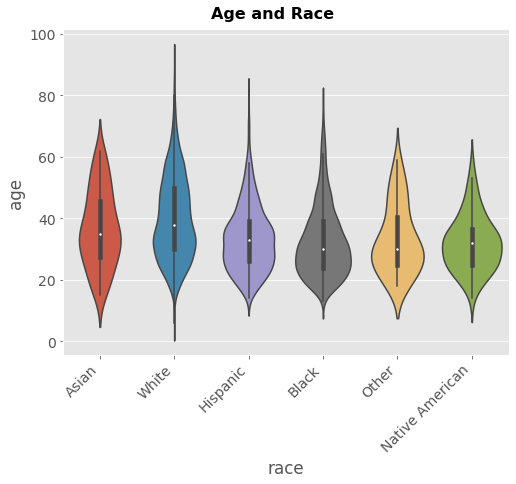

In [ ]:
ax = sns.violinplot(x= "race", y="age", inner = "box", data = df)
plt.text(x=1.5, y=105.0, s='Age and Race', fontsize=16, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [ ]:
#summary statitics for Age column. Mean age of 36 for deaths, which is relativley young. 
print(df.describe())

               age
count  4474.000000
mean     36.599687
std      12.786891
min       6.000000
25%      27.000000
50%      34.000000
75%      45.000000
max      91.000000


# **9. Gender:** 

 **Between 2015-2020, 96% of the deaths involved men and 4 % involved women.**

Text(0.1, 4500.0, 'Deaths by Gender')

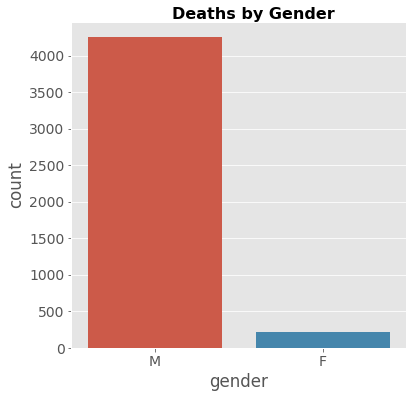

In [ ]:
#GENDER
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x='gender', data=df)
plt.text(x=0.1, y=4500.0, s='Deaths by Gender', fontsize=16, weight='bold')

# **10. Mental Illness:**

24% of the deaths involved the deceased having a history of mental health issues, expressing suicidal intentions or was experiencing mental distress at the time of the shooting.

Text(-0.2, 3700.0, 'Deaths and Mental Illness')

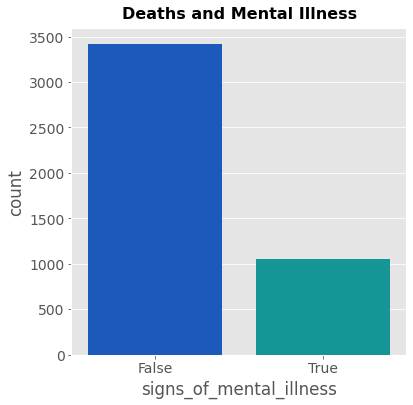

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x='signs_of_mental_illness', data=df, palette = 'winter')
plt.text(x=-0.2, y=3700.0, s='Deaths and Mental Illness', fontsize=16, weight='bold')

# **11. body worn cameras:**

88% of deaths involved the police officer not wearing a body camera while 12% involved the officer wearing a body camera.

Text(-0.2, 4200.0, 'Deaths and Officer Bodycams')

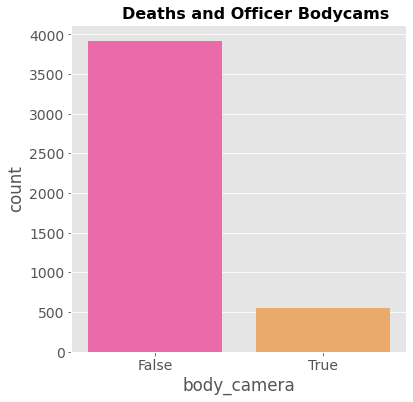

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x='body_camera', data=df, palette = 'spring')
plt.text(x=-0.2, y=4200.0, s='Deaths and Officer Bodycams', fontsize=16, weight='bold')

# **12. Race:**

Race is the main attribute I am interested in examining for this analysis. 
I used the groupby function to take a quick look at the deaths between each racial group, and at first glance whites appeared to have experienced the most deaths followed by blacks and hispanics. But whites are a racial majority in the United States, so this doesn't convey the full picture regarding death rates. In other words, which group experienced the highest death rate? 

In [ ]:
#Examine the amount of deaths in each racial group. Whites have the highest amount of deaths followed by Blacks and Hispanics. 
# Whites are a majority population in the U.S, so this fact must be taken into abccount before ascertaining which racial group.. 
# ..dies at a higher rate. 

print(df.groupby('race').size())

race
Asian                83
Black              1184
Hispanic            801
Native American      71
Other                43
White              2292
dtype: int64


**I created a new data frame that displayed race, total_deaths in each race,  	total race IAW the U.S census, and most importantly the	death rates for each race. **

In [ ]:
 # create a new data frame that displays race, total_deaths in each race, total race IAW the U.S census, and the death rates for each race. 
black = []
white = []
hispanic = []
asian = []
native_american = []
other = []
for race in df['race']:
    if race == 'Black':
        black.append(race)
    elif race =='White':
        white.append(race)
    elif race =='Hispanic':
        hispanic.append(race)
    elif race =='Native American':
        native_american.append(race)
    elif race =='Other':
        other.append(race)
    elif race =='Asian':
        asian.append(race)

black_total = len(black)
white_total = len(white)
hispanic_total = len(hispanic)
asian_total = len(asian)
native_american_total = len(native_american)
other_total = len(other)

dict_1 = {'Black': black_total, 
          'White': white_total, 
          'Hispanic':hispanic_total,
         'Asian': asian_total,
         'Native American': native_american_total,
         'Other': other_total}



df2 = pd.DataFrame(list(dict_1.items())) 
df2.columns = ['race', 'total_deaths']
df2.head(5)
    

,race,total_deaths
0,Black,1184
1,White,2292
2,Hispanic,801
3,Asian,83
4,Native American,71


**For the total race column, I used information from the national census (https://www.census.gov/quickfacts/fact/table/US/PST045219), which I used to calculate the total population for each racial group. **

In [ ]:
# Create a new series that lists the population of each racial group in the U.S according to the.. 
#..census data for total U.S population and race (https://www.census.gov/quickfacts/fact/table/US/PST045219). 
# This series will be added to our new data frame (df2)

total_population = 328239523             
total_white = total_population * 0.763
total_black = total_population *0.134
total_hispanic = total_population * 0.185
total_asian = total_population * 0.0590
total_native_american = total_population * 0.0130
total_other = total_population * 0.030

print(f'total whites {total_white}, total blacks {total_black}, total hispanic {total_hispanic}, total_asian {total_asian},total native american {total_native_american}, total_other {total_other}')


total whites 250446756.049, total blacks 43984096.082, total hispanic 60724311.755, total_asian 19366131.857,total native american 4267113.799, total_other 9847185.69


In [ ]:
total_race = [43984096.082, 250446756.049, 60724311.755, 19366131.857, 4267113.799, 9847185.69] 
  
df2['total_race'] = total_race 
df2.round({'total_race': 5})
df2['total_deaths'] = df2['total_deaths'].astype('int64')
df2['total_race'] = df2['total_race'].astype('int64')
df2

,race,total_deaths,total_race
0,Black,1184,43984096
1,White,2292,250446756
2,Hispanic,801,60724311
3,Asian,83,19366131
4,Native American,71,4267113
5,Other,43,9847185


In [ ]:
df2['deaths_per_race']=df2['total_deaths'] / df2['total_race']   
df2

,race,total_deaths,total_race,deaths_per_race
0,Black,1184,43984096,0.000027
1,White,2292,250446756,0.000009
2,Hispanic,801,60724311,0.000013
3,Asian,83,19366131,0.000004
4,Native American,71,4267113,0.000017
5,Other,43,9847185,0.000004


In [ ]:
df2['death rate']=df2['deaths_per_race'] *(10**6)
df2

,race,total_deaths,total_race,deaths_per_race,death rate
0,Black,1184,43984096,0.000027,26.918821
1,White,2292,250446756,0.000009,9.151646
2,Hispanic,801,60724311,0.000013,13.190763
3,Asian,83,19366131,0.000004,4.285833
4,Native American,71,4267113,0.000017,16.638884
5,Other,43,9847185,0.000004,4.366730


**With this new data frame (df2) I can now plot a visual indicating the death rates between each racial group. **

**As the barcharts below indicate, between 2015 and 2020, whites appeared to suffer the most deaths from police shootings. But this doesn't indicate which group is getting killed at the highest rate.  **

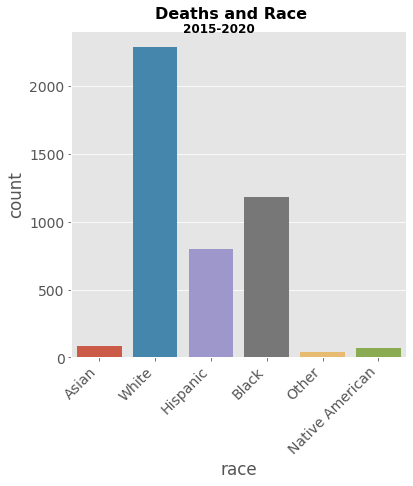

In [ ]:
# Total deaths in each racial group between 2015 and 2020 
# At first apperanc it appears more white are killed, but they are a majority of the U.S popoluation
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x='race', data=df)
plt.text(x=1.0, y=2500.0, s='Deaths and Race', fontsize=16, weight='bold')
plt.text(x=1.5, y=2400.0, s='2015-2020', fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

**Using the df2 data frame, the barcharts below indicate a different plot where between 2015 and 2020, although more whites died, blacks died at a higher rate followed by native americans and hispanics. **

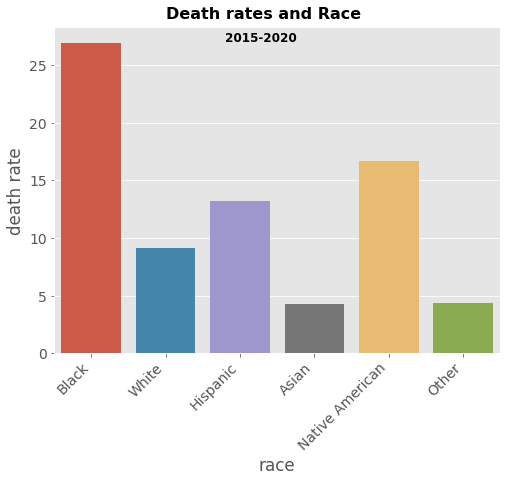

In [ ]:
#Using our new data frame (df2) we can observe the deaths per mmillion for each racial group in the U.S. 
# blacks are killed at the highest rates at 27 deaths per 1 million
# they are followed by Native Americans with 17 deaths per million, hispanics at 13 deaths per million and.. 
# ..whites at 9 deaths per million
ax = sns.barplot(x = 'race', y = 'death rate', data = df2)
plt.text(x=1.0, y=29.0, s='Death rates and Race', fontsize=16, weight='bold')
plt.text(x=1.8, y=27.0, s='2015-2020', fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

# **13. Weapons:**  

The common weapons yielded by suspects were:

gun-49% 

knife-13%

unarmed-6%

toy weapon-3 % 

The remaining 29% involved weapons including swords, machetes, tasers, and air conditioners.

Text(-20.0, -1.0, 'Armed or Unarmed')

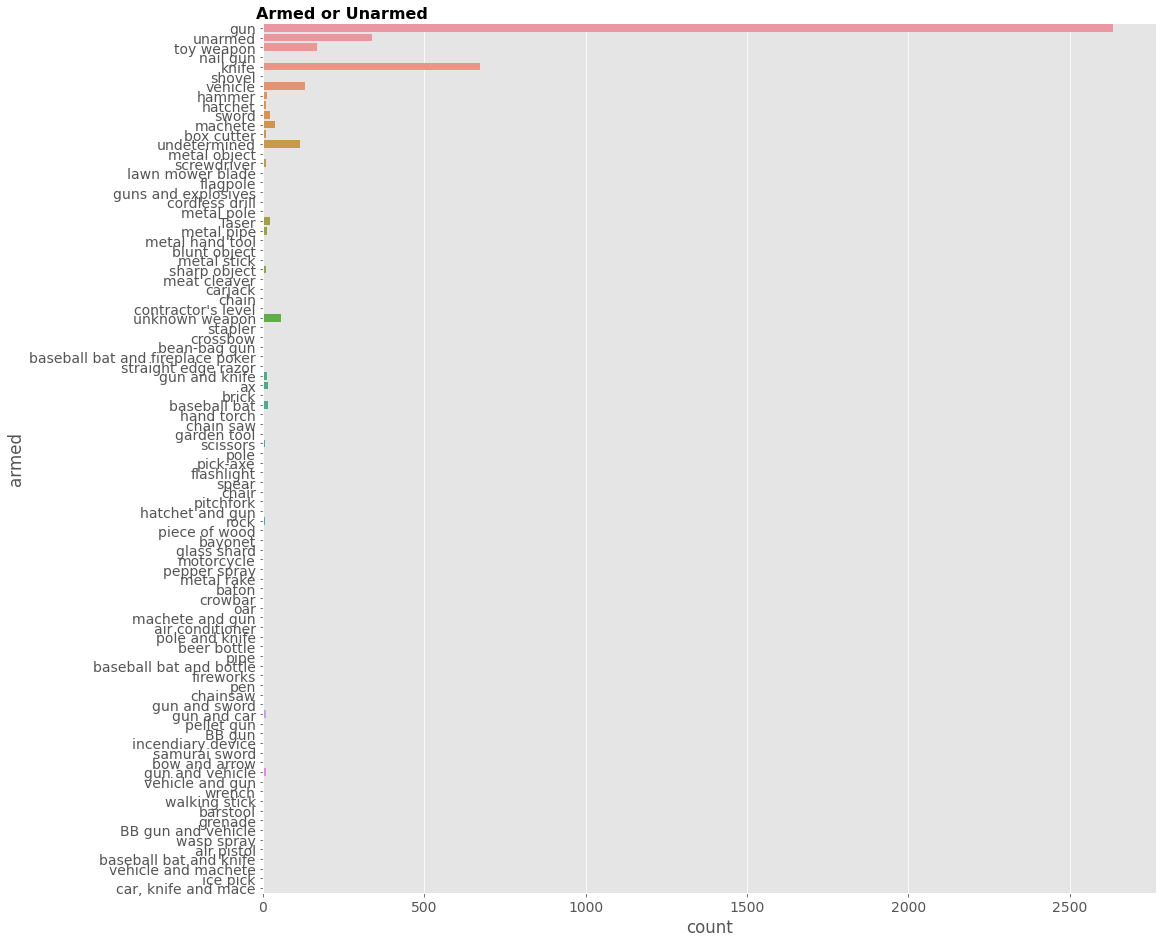

In [ ]:
f, ax = plt.subplots(figsize=(16, 16))
ax = sns.countplot(y='armed', data=df)
plt.text(x=-20.0, y=-1.0, s='Armed or Unarmed', fontsize=16, weight='bold')

# **14. FLEEING VS NON FLEEING:** 

The non-fleeing suspects were killed at higher rates. 

67% deaths from non-fleeing 

33% deaths from fleeing

<Figure size 576x432 with 0 Axes>

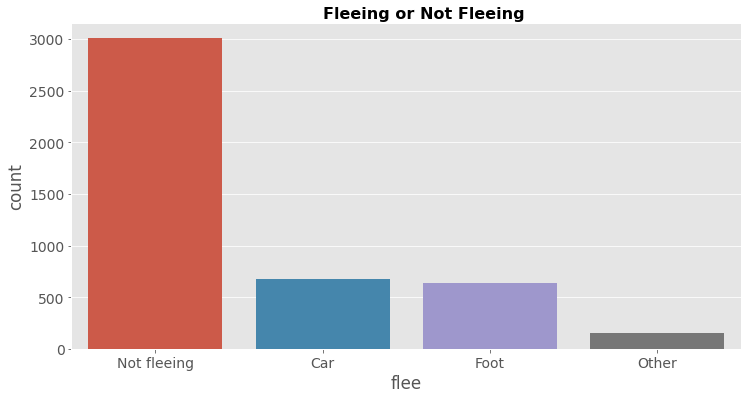

In [ ]:
target = "flee"
figure()
width=12
height=6
figure(figsize=(width,height))
sns.countplot(data=df,x=target)
plt.text(x=1.0, y=3200.0, s='Fleeing or Not Fleeing', fontsize=16, weight='bold')
show();

# **15. Armed/Unarmed and Race**

**The highest death rates involved a gun, knife, unarmed, or a toy weapon. I want to further examine the correlation between being armed or unarmed and the suspect either fleeing or not fleeing from the police officer. I created another new dataframe to explore this. **

In [ ]:
# The highest death rates involved a gun, knife, unarmed, or a toy weapon. Let's make a new data frame to examine the..
#..the fleeing and non-fleeing subjects and the weapons involved. 
df_gun = df[['armed', 'flee']].copy()
df_gun.head(5)

,armed,flee
0,gun,Not fleeing
1,gun,Not fleeing
2,unarmed,Not fleeing
3,toy weapon,Not fleeing
4,nail gun,Not fleeing


In [ ]:
df_gun2 = df_gun.loc[(df_gun['armed']=='gun')  | (df_gun['armed']=='unarmed') | (df_gun['armed']=='knife') | (df_gun['armed']=='toy weapon')]
df_gun2.head()  

,armed,flee
0,gun,Not fleeing
1,gun,Not fleeing
2,unarmed,Not fleeing
3,toy weapon,Not fleeing
5,gun,Not fleeing


**For all different cases for fleeing (not fleeing, car, foot, and other) the most deaths involved the suspect having a firearm for each case. There is a clear link between high death rates and the presence of a firearm. **



Text(1.0, -0.6, 'Fleeing Armed or Unarmed')

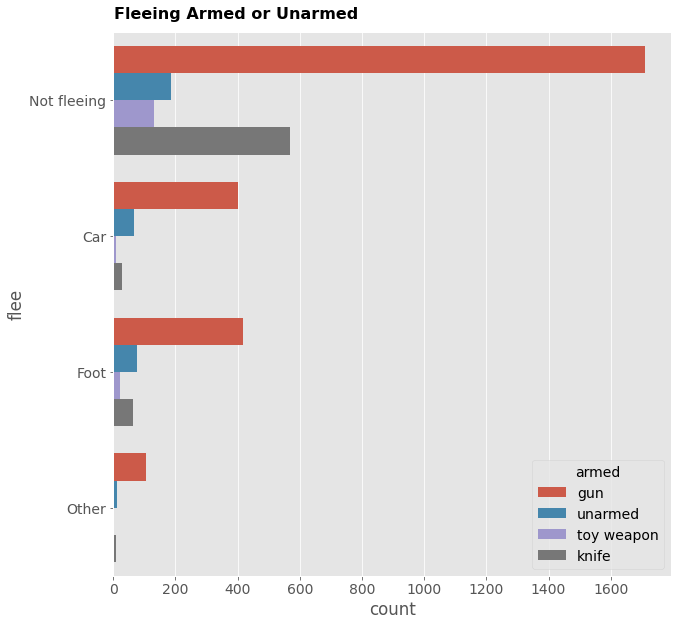

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(y='flee', data=df_gun2, hue = 'armed')
plt.text(x=1.0, y=-0.6, s='Fleeing Armed or Unarmed', fontsize=16, weight='bold')

**I am now interested in how race plays into this observation, so I created another data frame to further explore this observation. **

In [ ]:
# How race factor into this observation
df_race = df[['armed', 'race']].copy()
df_race.head()

,armed,race
0,gun,Asian
1,gun,White
2,unarmed,Hispanic
3,toy weapon,White
4,nail gun,Hispanic


In [ ]:
df_race2 = df_race.loc[(df_race['armed']=='gun')  | (df_race['armed']=='unarmed') | (df_race['armed']=='knife') | (df_race['armed']=='toy weapon')]
df_race2.head() 

,armed,race
0,gun,Asian
1,gun,White
2,unarmed,Hispanic
3,toy weapon,White
5,gun,White


In [ ]:
df_race2['race'].value_counts()

White              1981
Black              1016
Hispanic            651
Asian                67
Native American      60
Other                36
Name: race, dtype: int64

Text(1.0, 1500.0, 'Race while Armed or Unarmed')

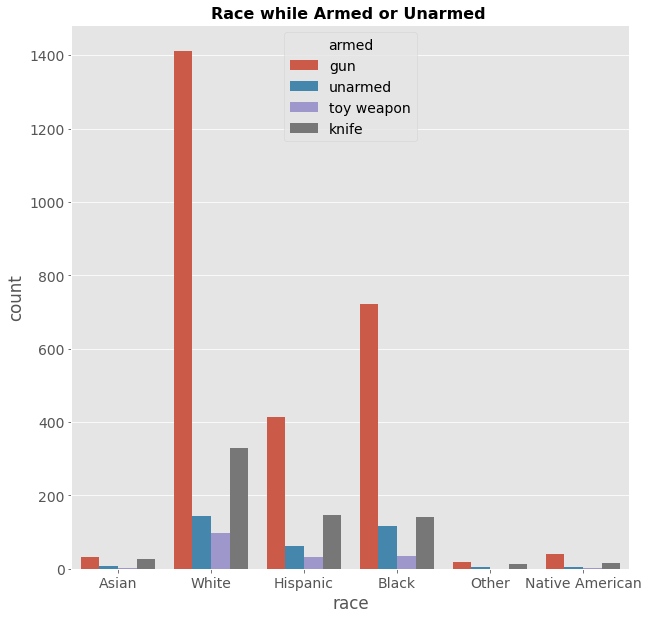

In [ ]:
# The highest death rates involved a firearm for each racial group
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(x='race', data=df_race2, hue = 'armed')
plt.text(x=1.0, y=1500.0, s='Race while Armed or Unarmed', fontsize=16, weight='bold')

**Whites experienced the most deaths, when armed with a gun, a knife, or a toy weapon. Total deaths for whites while unarmed were close to the total deaths for unarmed blacks.** 

# **16. Unarmed and Fleeing**

Shooting an unarmed individual while they are fleeing on foot is highly suspect and may be indicative of a possible racial bias. I will examine the rates of each racial group getting killed while fleeing and unarmed with the creation of a new data frame. 

In [ ]:
df_flee_foot = df[['armed', 'flee', 'race']].copy()
df_flee_foot.head(5)

,armed,flee,race
0,gun,Not fleeing,Asian
1,gun,Not fleeing,White
2,unarmed,Not fleeing,Hispanic
3,toy weapon,Not fleeing,White
4,nail gun,Not fleeing,Hispanic


In [ ]:
df_flee_foot2= (df_flee_foot[df_flee_foot.flee == 'Foot'])
df_flee_foot2.head(5)

,armed,flee,race
14,gun,Foot,Black
23,gun,Foot,Hispanic
24,gun,Foot,White
32,gun,Foot,Black
39,gun,Foot,Black


In [ ]:
df_flee_foot2= (df_flee_foot2[df_flee_foot2.armed == 'unarmed']) 
df_flee_foot2.head(5)

,armed,flee,race
72,unarmed,Foot,White
76,unarmed,Foot,White
102,unarmed,Foot,Hispanic
119,unarmed,Foot,White
164,unarmed,Foot,Black


In [ ]:
df_flee_foot2['race'].value_counts()

Black              37
White              24
Hispanic           10
Native American     2
Other               1
Asian               1
Name: race, dtype: int64

**The highest amount of deaths while fleeing on foot and unarmed occured with blacks which accounted for 49% of the deaths. The next highest deaths were with whites at 32% and hispanics at 13%**

Text(1.0, 40.0, 'Deaths Fleeing and Unarmed')

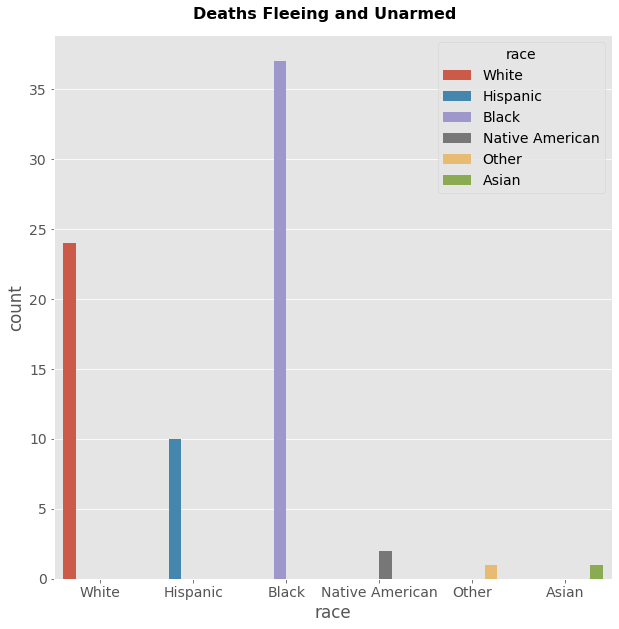

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(x='race', data=df_flee_foot2, hue = 'race')
plt.text(x=1.0, y=40.0, s='Deaths Fleeing and Unarmed', fontsize=16, weight='bold')

# **17. Challenges Encountered**

I spent some time trying to figure out how to create particular countplots for data that didn’t exist on the main dataset, ie. a countplot that displayed race and death rates. I also encountered an error whenever I tried to display this dataframe, and I could not find any error in my code. I ended up searching through forums including stack overflow and I found that I had to initiate this line of code (pip install "pandas==1.0.3" –user). This fixed the problem. Lastly, I had some issues deciding which visualizations would be most pragmatic for the mostly categorical data, and I found that countplots worked very well for this type of data. 



# **18. Key insights derived from analysis:**

*Younger people tended to get shot by more by the police (between about 20 and 40) for all races.

*Disproportionally more men were shot by the police than females (96% for men and 4% for women)

*24% of deaths involved the deceased having a history of mental health issues, expressing suicidal intentions or was experiencing mental distress at the time of the shooting.

*88% of deaths for all subjects involved the officer not wearing a body worn camera. 

*Between 2015 and 2020, more whites were shot by the police, but blacks were killed at the highest rates by the police followed by Native Americans and Hispanics. 

*Regarding being armed, the most subjects killed had a gun, the second highest were armed with a knife, the third highest killed were unarmed, and the forth highest killed had toy weapons. 

*67% of deaths involved the subjects not fleeing from the police, and out of the subjects who were fleeing or not-fleeing, the ones who had a gun were killed the most. 

*For subjects fleeing on foot and unarmed, blacks had the highest amount of deaths at 49%. The next highest deaths were with whites at 32% and hispanics at 13%

# **19. Conclusion**

My goal with this analysis was to identify factors that were involved with the deaths of citizens from police officers in the United States and identify any possible correlations or causal factors that lead to police shootings and how they relate to factors like race. I have identified some factors that appear to correlate with more deaths from police shootings. I noted that more deaths occurred with a younger population with more deaths occurring with younger minority groups. Males experienced more deaths than women, subjects with a mental illness actually experienced less deaths than those without a mental condition, and a majority of shootings occurred when officers were not wearing a body camera. The main issue regarding race and police shootings showed some interesting results. From 2015-2020, whites experienced the most deaths followed by blacks and Hispanics. However, blacks, Native Americans, and Hispanics experienced higher rates of deaths than whites. What the subjects were armed with seemed to play a huge factor in police shootings. Not surprisingly, those armed with a firearm experienced the most deaths for every racial group followed by those armed with knives. Clearly, a police officer has an obligation to eliminate a threat who can do harm to him or her and to bystanders, so the correlation between police deaths and the subjects being armed with a firearm is not so surprising. But with the high density of firearms in the United States, it may be possible that officers may treat all subjects as potentially having a firearm. Subjects who were unarmed and armed with toy weapons were the 3rd and 4th largest deaths from 2015-2020. More studies and analysis will need to be performed, but it may be possible that many officers default to subjects potentially having a firearm even though the subjects may be unarmed or have toys. We’ve seen evidence of this from news reports where subjects held objects like wallets or made sudden unexpected movements, mimicking someone who may possibly be "reaching" for a firearm. My final find was the most interesting to me. It involved examining police shootings of unarmed individuals who were fleeing on foot. The practice of shooting unarmed subjects while fleeing is highly controversial and it may possibly reveal potential bias in the eyes of officers. The highest amount of deaths while fleeing on foot and unarmed occurred with blacks followed by whites and Hispanics. From this analysis, my biggest take aways were there is clearly a link between the possession of firearms and deaths from police shootings and there appears to be indications of potential racial bias with the higher death rate for blacks and other minorities and the larger amount of shootings of unarmed blacks fleeing on foot. I think these findings are certainly not a final settlement, but they certainly warrant further study.